# Figures for CNS 2017

In [3]:
import numpy as np
import scipy as s
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io
import scipy.signal

from scipy.stats import ttest_ind
from sklearn import linear_model

mpl.rcParams['figure.figsize'] = (16, 10)
%matplotlib inline

In [4]:
subjya = np.load('../../data/gng/results/2016-10-27_01-04-21/subjya-2-24-ransac.npy').item()
subjoa = np.load('../../data/gng/results/2016-10-27_01-04-21/subjoa-2-24-ransac.npy').item()

dict_keys(['psd', 'slope', 'fitline', 'psd_rm_alpha'])

In [23]:
subjya[0][0].keys() # Has 58 channels

dict_keys(['psd', 'slope', 'fitline', 'psd_rm_alpha'])

In [20]:
channels = ["A1","A2","A3","A4","A5","A6","A7","A8","A10","A11","A12","A13","A14","A15","A16","A17","A18","A21","A22","A23","A24","A25","A26","A27","A29","A30","A31","B1","B2","B3","B4","B5","B6","B8","B9","B10","B11","B12","B13","B14","B17","B18","B19","B20","B21","B22","B23","B24","B26","B27","B28","B29","B30","FRONTAL","LTEMPORAL","CENTRAL","RTEMPORAL","OCCIPITAL"]
len(channels)

58

In [31]:
# We're going to grab the occipital electrodes:
chans = [24, 25, 26, 48, 49, 51, 52]

In [40]:
psds_ya = []
for i in range(subjya['nbsubj']):
    psds_ya.append( np.mean([subjya[i][ch]['psd'] for ch in chans], axis=0) )
psd_ya = np.mean(psds_ya, axis=0)

psds_oa = []
for i in range(subjoa['nbsubj']):
    psds_oa.append( np.mean([subjoa[i][ch]['psd'] for ch in chans], axis=0) )
psd_oa = np.mean(psds_oa, axis=0)

In [76]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

sns.set_context('poster')
sns.set_style('white', {'axes.linewidth': 3.0})#, 'font.family': 'Helvetica'})

In [77]:
def remove_freq_buffer(data, lofreq, hifreq):
    """
    Removes a frequency buffer from a PSD or frequency vector.
    """
    data = np.delete(data, range(lofreq*2, hifreq*2))
    return data.reshape(len(data), 1)


def ransac_slope(f, psd, lofreq, hifreq):
    """
    Robustly fits line to the PSD, using the RANSAC algorithm.
    Returns slope and fit line.
    """
    model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
    model_ransac.fit(f[lofreq*2:hifreq*2], np.log10(psd[lofreq*2:hifreq*2]))
    fit_line = model_ransac.predict(f)
    return model_ransac.estimator_.coef_[0] * (10**2), fit_line

In [78]:
psd_oa_rm_alpha = remove_freq_buffer(psd_oa, 7, 14)
psd_ya_rm_alpha = remove_freq_buffer(psd_ya, 7, 14)
slope, oa_fitline = ransac_slope(subjoa['f'], psd_oa_rm_alpha, 2, 24)
slope, ya_fitline = ransac_slope(subjoa['f'], psd_ya_rm_alpha, 2, 24)

In [81]:
len(subjoa['f_rm_alpha'])

499

In [82]:
len(psd_oa_rm_alpha)

499

In [85]:
len(psd_ya_rm_alpha)

499

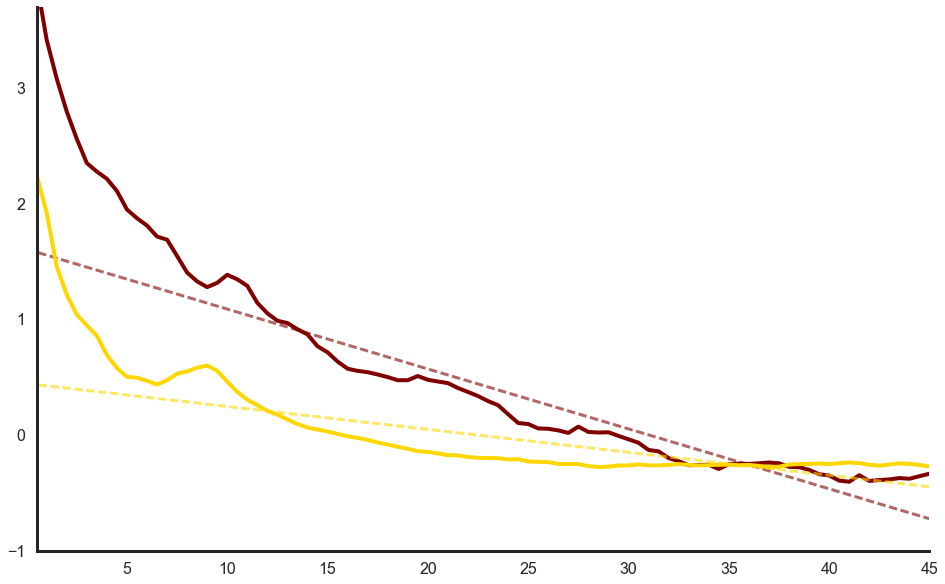

In [92]:
# sns.set_style('white')
# sns.set_context('poster')
plt.figure(figsize=(16, 10))
plt.plot(subjya['f'], np.log10(psd_ya), color='maroon', linewidth=4.0)
plt.plot(subjya['f'], ya_fitline+0.5, '--', alpha=0.6, color='maroon', linewidth=3.0)
plt.plot(subjoa['f'], np.log10(psd_oa), color='gold', linewidth=4.0)
plt.plot(subjoa['f'], oa_fitline+0.3, '--', alpha=0.6, color='gold', linewidth=3.0)
plt.xlim([.5, 45])
plt.ylim([-1, 3.7])
sns.despine()#offset=10)

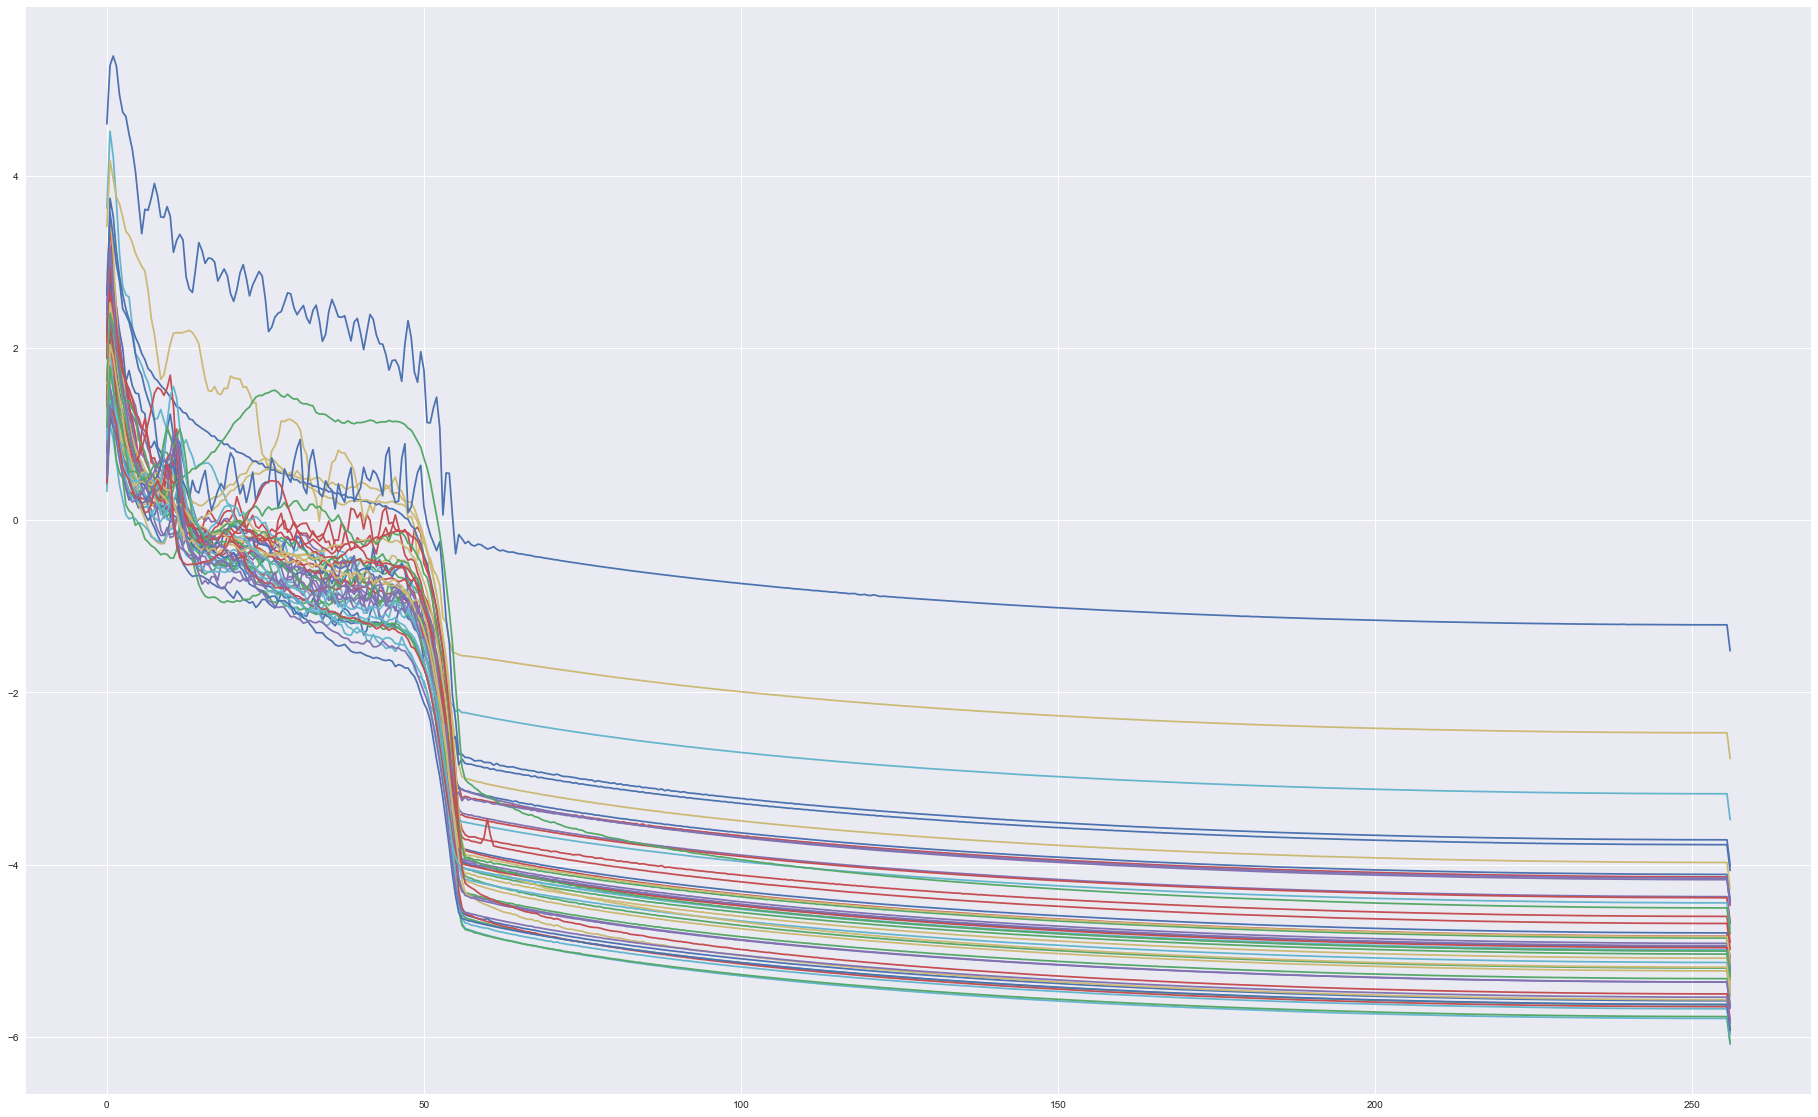

In [30]:

# for i in range(subjya['nbsubj']):
#     plt.plot(subjya['f'], np.log10(subjya[i][0]['psd']))

In [50]:
subjdata = sp.io.loadmat('../../data/gng/ExclFiltCARClust-mat/112113113.mat')

In [51]:
data = np.squeeze(subjdata['data'])

In [52]:
data.shape

(58, 877056)

In [53]:
f, psd = sp.signal.welch(data[-1][:], 512, nperseg=512*2, noverlap=512, window='hamming')

(0, 45)

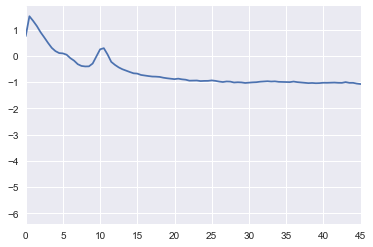

In [54]:
plt.plot(f, np.log10(psd)); plt.xlim([0, 45])

# Resting-state Data


In [69]:
subjdmn = np.load('../../data/runs/2017-03-11/raw_output/dmn/match-oa-trials/subj-2-24-ransac.npy')

ImportError: No module named 'subject'